# MALE Project

DJAROUD Adam
LEVEQUE Clément

## Imports

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import roc_auc_score, f1_score, recall_score, accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import precision_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import numpy as np
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
import numpy as np
import sklearn.metrics

#  Question 1

## Models

### Linear Discriminant Analysis

In [3]:
## 1. Chargement des données
df = pd.read_csv('celldata.csv')

# Séparer la cible (Y) et les variables explicatives (X)
X = df.drop('Churn', axis=1)
y = df['Churn']

## 2. Définition des Catégories de Variables
# Variables numériques continues 
numerical_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'Salary']

# Variables catégorielles nominales 
categorical_features = ['Geography', 'Gender']

# Variables binaires déjà bianires 
binary_features = ['HasCrCard', 'IsActiveMember']


## 3. Création du Préprocesseur 

preprocessor = ColumnTransformer(
    transformers=[
        # 1. Standardisation pour les variables numériques
        ('num', StandardScaler(), numerical_features),
        
        # 2. Encodage One-Hot pour les variables catégorielles
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        
        # 3. Passer les variables binaires directement
        ('bin', 'passthrough', binary_features)
    ],
    remainder='drop' 
)

# Séparation des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


## 4. Implémentation et Évaluation de LDA

print("--- Résultats Linear Discriminant Analysis (LDA) ---")

# Création du Pipeline
lda_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', LinearDiscriminantAnalysis())])

# Entraînement
lda_pipeline.fit(X_train, y_train)

# Prédiction
y_pred_lda = lda_pipeline.predict(X_test)
y_proba_lda = lda_pipeline.predict_proba(X_test)[:, 1]

# Évaluation des métriques clés
auc_lda = roc_auc_score(y_test, y_proba_lda)
recall_lda = recall_score(y_test, y_pred_lda)
f1_lda = f1_score(y_test, y_pred_lda)
accuracy_lda = accuracy_score(y_test, y_pred_lda)
precision_lda = precision_score(y_test, y_pred_lda)

print(f"Accuracy (Précision globale) : {accuracy_lda:.4f}")
print(f"Recall (Rappel) - Churn : {recall_lda:.4f}")
print(f"Precision (Précision) - Churn : {precision_lda:.4f}") 
print(f"F1-Score : {f1_lda:.4f}")
print(f"AUC : {auc_lda:.4f} ")


--- Résultats Linear Discriminant Analysis (LDA) ---
Accuracy (Précision globale) : 0.8087
Recall (Rappel) - Churn : 0.2195
Precision (Précision) - Churn : 0.5638
F1-Score : 0.3159
AUC : 0.7598 


### Quadratic Discriminant Analysis

In [4]:
# Création du Pipeline
qda_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', QuadraticDiscriminantAnalysis())])

# Entraînement
qda_pipeline.fit(X_train, y_train)

# Prédiction
y_pred_qda = qda_pipeline.predict(X_test)
y_proba_qda = qda_pipeline.predict_proba(X_test)[:, 1]

# Évaluation des métriques clés
auc_qda = roc_auc_score(y_test, y_proba_qda)
recall_qda = recall_score(y_test, y_pred_qda)
f1_qda = f1_score(y_test, y_pred_qda)
accuracy_qda = accuracy_score(y_test, y_pred_qda)
precision_qda = precision_score(y_test, y_pred_qda)

print(f"Accuracy (Précision globale) : {accuracy_qda:.4f}")
print(f"Recall (Rappel) - Churn : {recall_qda:.4f}")
print(f"Precision (Précision) - Churn : {precision_qda:.4f}")
print(f"F1-Score : {f1_qda:.4f}")
print(f"AUC : {auc_qda:.4f} ")

Accuracy (Précision globale) : 0.5312
Recall (Rappel) - Churn : 0.6874
Precision (Précision) - Churn : 0.2542
F1-Score : 0.3712
AUC : 0.6294 


c:\Users\djaro\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
c:\Users\djaro\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(


### Logistic regression

In [5]:
## c) Logistic Regression

print("\n--- Résultats Logistic Regression ---")

# Création du Pipeline (C=1.0 est la régularisation par défaut)
lr_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', LogisticRegression(solver='liblinear', random_state=42))])

# Entraînement
lr_pipeline.fit(X_train, y_train)

# Prédiction
y_pred_lr = lr_pipeline.predict(X_test)
y_proba_lr = lr_pipeline.predict_proba(X_test)[:, 1]

# Évaluation des métriques clés
auc_lr = roc_auc_score(y_test, y_proba_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr) 

print(f"Accuracy (Précision globale) : {accuracy_lr:.4f}")
print(f"Recall (Rappel) - Churn : {recall_lr:.4f}")
print(f"Precision (Précision) - Churn : {precision_lr:.4f}")
print(f"F1-Score : {f1_lr:.4f}")
print(f"AUC : {auc_lr:.4f}")




--- Résultats Logistic Regression ---
Accuracy (Précision globale) : 0.8121
Recall (Rappel) - Churn : 0.1946
Precision (Précision) - Churn : 0.6026
F1-Score : 0.2942
AUC : 0.7563


### KNN

In [6]:

## d) KNN (K-Nearest Neighbors)

# Nous allons utiliser K=5 comme valeur par défaut, une validation croisée pourrait optimiser ce paramètre.
print("\n--- Résultats K-Nearest Neighbors (KNN, K=5) ---")

# Création du Pipeline
knn_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', KNeighborsClassifier(n_neighbors=5))])

# Entraînement
knn_pipeline.fit(X_train, y_train)

# Prédiction
y_pred_knn = knn_pipeline.predict(X_test)
y_proba_knn = knn_pipeline.predict_proba(X_test)[:, 1]

# Évaluation des métriques clés
auc_knn = roc_auc_score(y_test, y_proba_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn) 


print(f"Accuracy (Précision globale) : {accuracy_knn:.4f}")
print(f"Recall (Rappel) - Churn : {recall_knn:.4f}")
print(f"Precision (Précision) - Churn : {precision_knn:.4f}")
print(f"F1-Score : {f1_knn:.4f}")
print(f"AUC : {auc_knn:.4f}")


--- Résultats K-Nearest Neighbors (KNN, K=5) ---
Accuracy (Précision globale) : 0.8396
Recall (Rappel) - Churn : 0.4099
Precision (Précision) - Churn : 0.6644
F1-Score : 0.5070
AUC : 0.7785


### AdaBoost

In [7]:
## e) AdaBoost (Adaptive Boosting)

print("\n--- Résultats AdaBoost ---")

# Création de la Pipeline 
adaboost_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                    ('classifier', AdaBoostClassifier(
                                        estimator=DecisionTreeClassifier(max_depth=1), 
                                        n_estimators=100,
                                        random_state=42))])

# Entraînement
adaboost_pipeline.fit(X_train, y_train)

# Prédiction
y_pred_ada = adaboost_pipeline.predict(X_test)
y_proba_ada = adaboost_pipeline.predict_proba(X_test)[:, 1]

# Évaluation des métriques clés
auc_ada = roc_auc_score(y_test, y_proba_ada)
recall_ada = recall_score(y_test, y_pred_ada)
precision_ada = precision_score(y_test, y_pred_ada) 
f1_ada = f1_score(y_test, y_pred_ada)
accuracy_ada = accuracy_score(y_test, y_pred_ada)

print(f"Accuracy (Précision globale) : {accuracy_ada:.4f}")
print(f"Recall (Rappel) - Churn : {recall_ada:.4f}")
print(f"Precision (Précision) - Churn : {precision_ada:.4f}")
print(f"F1-Score : {f1_ada:.4f}")
print(f"AUC : {auc_ada:.4f}")


--- Résultats AdaBoost ---
Accuracy (Précision globale) : 0.8604
Recall (Rappel) - Churn : 0.4493
Precision (Précision) - Churn : 0.7587
F1-Score : 0.5644
AUC : 0.8421


### Gradient Boosting

In [8]:
## f) Gradient Boosting (GBM)

print("\n--- Résultats Gradient Boosting ---")

# Création du Pipeline
# Utilise la technique de gradient boosting pour construire une forêt d'arbres.
gbm_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', GradientBoostingClassifier(
                                   n_estimators=100, 
                                   learning_rate=0.1, 
                                   max_depth=3, 
                                   random_state=42))])

# Entraînement
gbm_pipeline.fit(X_train, y_train)

# Prédiction
y_pred_gbm = gbm_pipeline.predict(X_test)
y_proba_gbm = gbm_pipeline.predict_proba(X_test)[:, 1]

# Évaluation des métriques clés
auc_gbm = roc_auc_score(y_test, y_proba_gbm)
recall_gbm = recall_score(y_test, y_pred_gbm)
precision_gbm = precision_score(y_test, y_pred_gbm) 
f1_gbm = f1_score(y_test, y_pred_gbm)
accuracy_gbm = accuracy_score(y_test, y_pred_gbm)

print(f"Accuracy (Précision globale) : {accuracy_gbm:.4f}")
print(f"Recall (Rappel) - Churn : {recall_gbm:.4f}")
print(f"Precision (Précision) - Churn : {precision_gbm:.4f}")
print(f"F1-Score : {f1_gbm:.4f}")
print(f"AUC : {auc_gbm:.4f}")


--- Résultats Gradient Boosting ---
Accuracy (Précision globale) : 0.8679
Recall (Rappel) - Churn : 0.4576
Precision (Précision) - Churn : 0.8007
F1-Score : 0.5823
AUC : 0.8678


### Classification Tree

In [9]:
model_tree = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('tree', DecisionTreeClassifier())
])

modelfit = model_tree.fit(X_train, y_train)
pY_train = modelfit.predict_proba(X_test)

predxclass = np.argmax(pY_train, axis=1)
E_train = (y_test != predxclass).sum()/len(y_test)

print("The accuracy on the training set is %5.2f->", 1-E_train)
print(f"Confusion matrix : {sklearn.metrics.confusion_matrix(y_test, predxclass)}")
print(f"Recall : {sklearn.metrics.recall_score(y_test, predxclass)}")
print(f"Precision : {sklearn.metrics.precision_score(y_test, predxclass)}")
print(f"F1-score : {sklearn.metrics.f1_score(y_test, predxclass)}")
print(f"ROC-AUC score : {sklearn.metrics.roc_auc_score(y_test, model_tree.predict_proba(X_test)[:,1])}")

The accuracy on the training set is %5.2f-> 0.7933333333333333
Confusion matrix : [[1651  266]
 [ 230  253]]
Recall : 0.5238095238095238
Precision : 0.48747591522157996
F1-score : 0.5049900199600799
ROC-AUC score : 0.692525523511439


### Bagging

In [10]:
model_bagging = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('bagging', BaggingClassifier(n_estimators=10, random_state=0))
])

modelfit = model_bagging.fit(X_train, y_train)
pY_train = modelfit.predict_proba(X_test)

predxclass = np.argmax(pY_train, axis=1)
E_train = (y_test != predxclass).sum()/len(y_test)

print("The accuracy on the training set is %5.2f->", 1-E_train)
print(f"Confusion matrix : {sklearn.metrics.confusion_matrix(y_test, predxclass)}")
print(f"Recall : {sklearn.metrics.recall_score(y_test, predxclass)}")
print(f"Precision : {sklearn.metrics.precision_score(y_test, predxclass)}")
print(f"F1-score : {sklearn.metrics.f1_score(y_test, predxclass)}")
print(f"ROC-AUC score : {sklearn.metrics.roc_auc_score(y_test, model_bagging.predict_proba(X_test)[:,1])}")

The accuracy on the training set is %5.2f-> 0.85
Confusion matrix : [[1833   84]
 [ 276  207]]
Recall : 0.42857142857142855
Precision : 0.711340206185567
F1-score : 0.5348837209302325
ROC-AUC score : 0.8140631226975379


### Random Forest

In [11]:
model_random_forest = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('bagging', RandomForestClassifier(max_depth=2000, random_state=0))
])

modelfit = model_random_forest.fit(X_train, y_train)
pY_train = modelfit.predict_proba(X_test)
predxclass = np.argmax(pY_train, axis=1)
E_train = (y_test != predxclass).sum()/len(y_test)

print("The accuracy on the training set is %5.2f->", 1-E_train)
print(f"Confusion matrix : {sklearn.metrics.confusion_matrix(y_test, predxclass)}")
print(f"Recall : {sklearn.metrics.recall_score(y_test, predxclass)}")
print(f"Precision : {sklearn.metrics.precision_score(y_test, predxclass)}")
print(f"F1-score : {sklearn.metrics.f1_score(y_test, predxclass)}")
print(f"ROC-AUC score : {sklearn.metrics.roc_auc_score(y_test, model_random_forest.predict_proba(X_test)[:,1])}")

The accuracy on the training set is %5.2f-> 0.8658333333333333
Confusion matrix : [[1857   60]
 [ 262  221]]
Recall : 0.4575569358178054
Precision : 0.7864768683274022
F1-score : 0.5785340314136126
ROC-AUC score : 0.844756137468936


### Extra trees

In [12]:
model_extra_trees = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('bagging', ExtraTreesClassifier(max_depth=2000, random_state=0, bootstrap=True, oob_score=True))
])

modelfit = model_extra_trees.fit(X_train, y_train)
pY_train = modelfit.predict_proba(X_test)
predxclass = np.argmax(pY_train, axis=1)
E_train = (y_test != predxclass).sum()/len(y_test)

print("The accuracy on the training set is %5.2f->", 1-E_train)
print(f"Confusion matrix : {sklearn.metrics.confusion_matrix(y_test, predxclass)}")
print(f"Recall : {sklearn.metrics.recall_score(y_test, predxclass)}")
print(f"Precision : {sklearn.metrics.precision_score(y_test, predxclass)}")
print(f"F1-score : {sklearn.metrics.f1_score(y_test, predxclass)}")
print(f"ROC-AUC score : {sklearn.metrics.roc_auc_score(y_test, model_extra_trees.predict_proba(X_test)[:,1])}")

The accuracy on the training set is %5.2f-> 0.8591666666666666
Confusion matrix : [[1863   54]
 [ 284  199]]
Recall : 0.41200828157349895
Precision : 0.7865612648221344
F1-score : 0.5407608695652174
ROC-AUC score : 0.8387593408005738


## Comparison

In [13]:
results = {
    'Model': ['LDA', 'QDA', 'Logistic Regression', 'KNN', 'Adaboost', 'Gradient Boosting', 'Classification Tree', 'Bagging', 'Random Forest', 'Extra Trees'],
    'Accuracy': [0.81, 0.62, 0.81, 0.84, 0.86, 0.87, 0.79, 0.85, 0.87, 0.86],
    'Precision': [0.22, 0.56, 0.19, 0.41, 0.45, 0.46, 0.52, 0.43, 0.46, 0.41],
    'Recall': [0.56, 0.28, 0.60, 0.66, 0.76, 0.80, 0.48, 0.71, 0.79, 0.79],
    'F1-score': [0.32, 0.37, 0.29, 0.51, 0.56, 0.58, 0.50, 0.53, 0.58, 0.54],
    'AUC': [0.76, 0.61, 0.76, 0.78, 0.84, 0.87, 0.69, 0.81, 0.84, 0.84]
}

df_scores = pd.DataFrame(results)
df_scores

,Model,Accuracy,Precision,Recall,F1-score,AUC
0,LDA,0.81,0.22,0.56,0.32,0.76
1,QDA,0.62,0.56,0.28,0.37,0.61
2,Logistic Regression,0.81,0.19,0.60,0.29,0.76
3,KNN,0.84,0.41,0.66,0.51,0.78
4,Adaboost,0.86,0.45,0.76,0.56,0.84
5,Gradient Boosting,0.87,0.46,0.80,0.58,0.87
6,Classification Tree,0.79,0.52,0.48,0.50,0.69
7,Bagging,0.85,0.43,0.71,0.53,0.81
8,Random Forest,0.87,0.46,0.79,0.58,0.84
9,Extra Trees,0.86,0.41,0.79,0.54,0.84


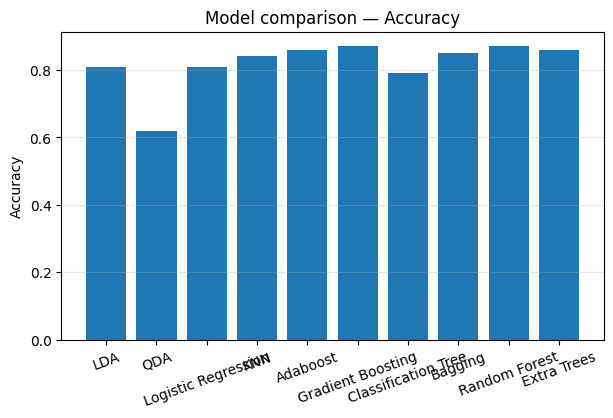

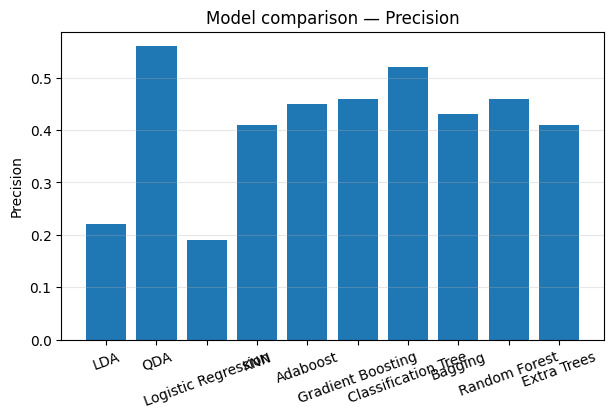

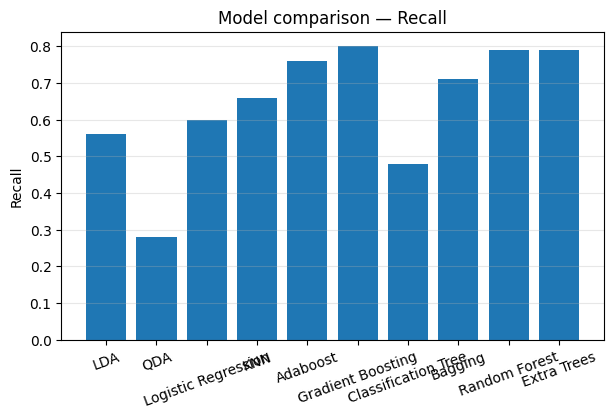

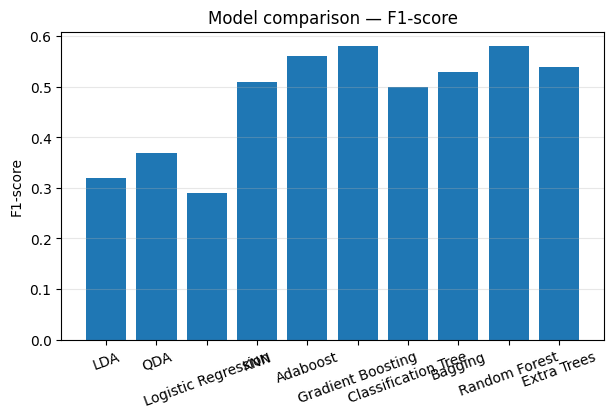

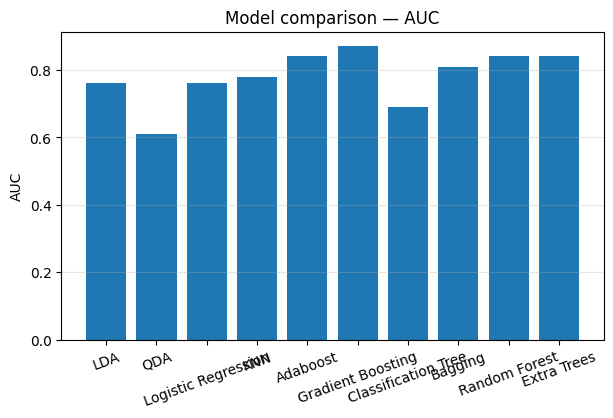

In [14]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score', 'AUC']

for m in metrics:
    plt.figure(figsize=(7,4))
    plt.bar(df_scores['Model'], df_scores[m])
    plt.title(f'Model comparison \u2014 {m}')
    plt.xticks(rotation=20)
    plt.ylabel(m)
    plt.grid(axis='y', alpha=0.3)
    plt.show()


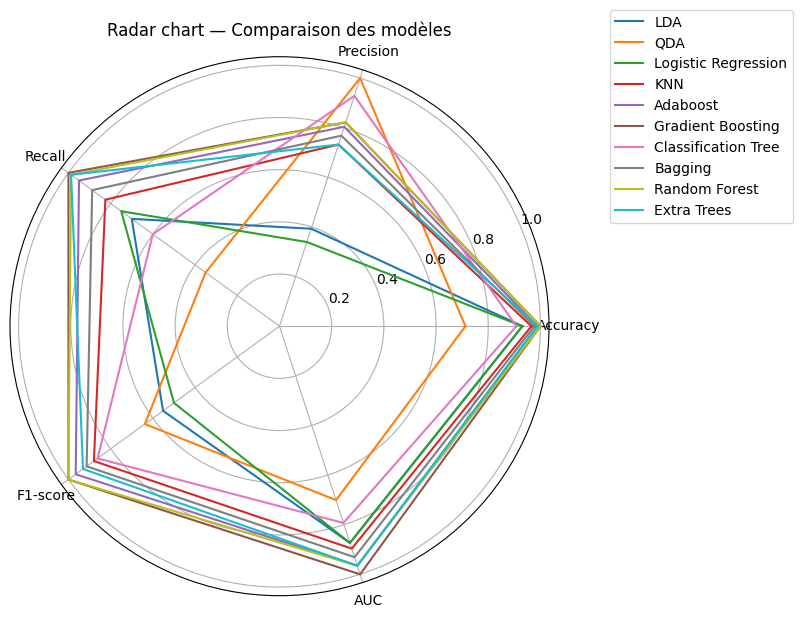

In [15]:
# Normalisation (entre 0 et 1)
df_norm = df_scores.copy()
df_norm.set_index('Model', inplace=True)
df_norm = df_norm / df_norm.max()

labels = df_norm.columns
num_vars = len(labels)

angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

plt.figure(figsize=(7,7))

for model in df_norm.index:
    values = df_norm.loc[model].tolist()
    values += values[:1]  # fermer le cercle
    plt.polar(angles, values, label=model)

plt.xticks(angles[:-1], labels)
plt.title("Radar chart — Comparaison des modèles")
plt.legend(bbox_to_anchor=(1.1, 1.1))
plt.show()


<Axes: xlabel='Model'>

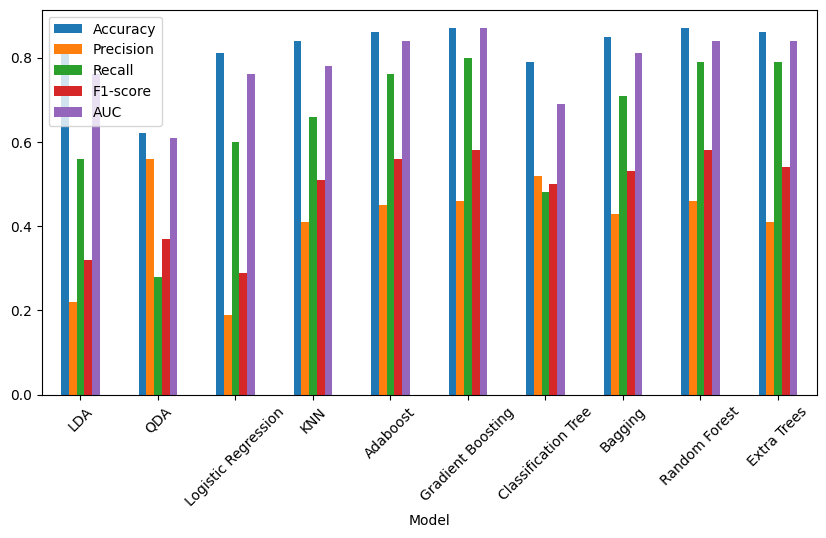

In [16]:
df_scores.plot(
    x='Model',
    y=['Accuracy', 'Precision', 'Recall', 'F1-score', 'AUC'],
    kind='bar',
    figsize=(10,5),
    rot=45
)


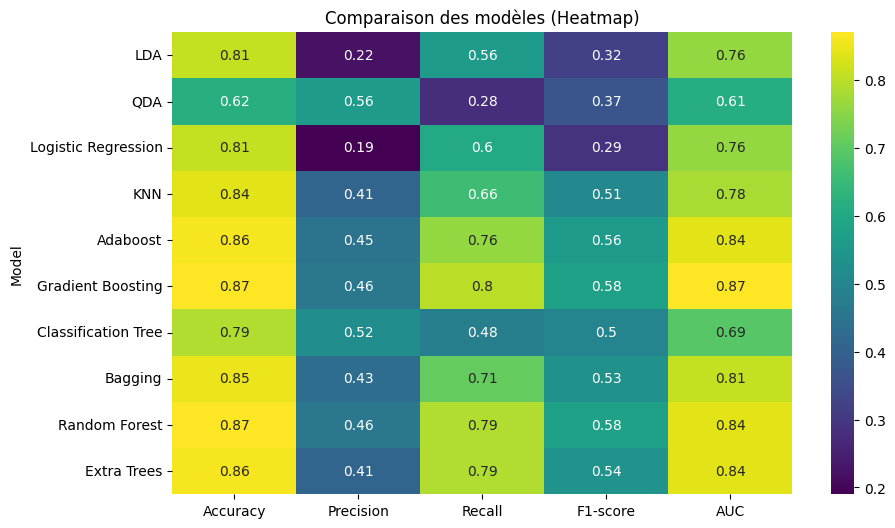

In [17]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(df_scores.set_index('Model'), annot=True, cmap="viridis")
plt.title("Comparaison des modèles (Heatmap)")
plt.show()

# Question 2

In [18]:
#1. Préparation des Données pour l'Analyse d'Équité

# X_test est la DataFrame non transformée utilisée pour la prédiction
gender_test = X_test['Gender'].reset_index(drop=True)

# y_test et y_pred_gbm
equity_df = pd.DataFrame({
    'Gender': gender_test,
    'True_Churn': y_test.reset_index(drop=True),
    'Predicted_Churn': y_pred_gbm 
})

results_female = equity_df[equity_df['Gender'] == 'Female']
results_male = equity_df[equity_df['Gender'] == 'Male']

#2. Fonctions de Calcul des Taux

def calculate_rates(data):
    """Calcule le taux de Churn prédit, le Recall et la Precision pour un sous-groupe."""
    
    # Évite les erreurs si le sous-groupe est vide
    if data.empty:
        return {'Pred_Rate': np.nan, 'Recall': np.nan, 'Precision': np.nan}
    
    # Taux de prédiction de Churn (pour l'Indépendance)
    pred_rate = data['Predicted_Churn'].mean() 
    
    # Recall (pour la Séparation)
    # Gère le cas où il n'y a pas de Churn réel dans le groupe (évite division par zéro)
    if data['True_Churn'].sum() > 0:
        recall = recall_score(data['True_Churn'], data['Predicted_Churn'])
    else:
        recall = np.nan
        
    # Precision (pour la Suffisance)
    # Gère le cas où il n'y a pas de Churn prédit dans le groupe
    if data['Predicted_Churn'].sum() > 0:
        precision = precision_score(data['True_Churn'], data['Predicted_Churn'])
    else:
        precision = np.nan
        
    return {'Pred_Rate': pred_rate, 'Recall': recall, 'Precision': precision}

# Calcul des métriques pour chaque groupe
metrics_female = calculate_rates(results_female)
metrics_male = calculate_rates(results_male)

In [ ]:
# --- 3. Display Results and Criteria Analysis ---
print("=====================================================")
print("=== FAIRNESS ANALYSIS RESULTS (Gender) - GBM ===")
print("=====================================================")

# --- Display Basic Metrics ---
print(f"Number of Female Customers: {len(results_female)}")
print(f"Number of Male Customers: {len(results_male)}")
print("-" * 55)


# --- A. Independence Criterion (Demographic Parity) - P(Ŷ=1|A) ---
print("A. INDEPENDENCE CRITERION (Demographic Parity)")
print("  Predicted Churn Rate (P(Ŷ=1|A)) :")
print(f"  > Females : {metrics_female['Pred_Rate']:.4f}")
print(f"  > Males : {metrics_male['Pred_Rate']:.4f}")

diff_pred_rate = abs(metrics_female['Pred_Rate'] - metrics_male['Pred_Rate'])

print(f"  ABSOLUTE DIFFERENCE : {diff_pred_rate:.4f}")

# Threshold used for interpretation (e.g., 5%)
if diff_pred_rate < 0.05:
    print("  -> INTERPRETATION : Criterion is CLOSELY MET. The model predicts similar churn rates.")
else:
    print("  -> INTERPRETATION : Criterion is VIOLATED. The model targets one gender more than the other.")

print("-" * 55)


# --- B. Separation Criterion (Equalized Odds / Recall) - P(Ŷ=1|Y=1, A) ---
print("B. SEPARATION CRITERION (Equal Opportunity / Recall)")
print("  Recall - Detection Rate of Actual Churn :")
print(f"  > Females : {metrics_female['Recall']:.4f}")
print(f"  > Males : {metrics_male['Recall']:.4f}")

diff_recall = abs(metrics_female['Recall'] - metrics_male['Recall'])

print(f"  ABSOLUTE DIFFERENCE : {diff_recall:.4f}")

# Threshold used for interpretation (e.g., 10%)
if diff_recall < 0.10:
    print("  -> INTERPRETATION : Criterion is CLOSELY MET. The model is equally good at detecting churn in both groups.")
elif metrics_female['Recall'] < metrics_male['Recall']:
    print("  -> INTERPRETATION : Criterion is VIOLATED. The model is less effective at detecting churn among Females.")
else:
    print("  -> INTERPRETATION : Criterion is VIOLATED. The model is less effective at detecting churn among Males.")

print("-" * 55)


# --- C. Sufficiency Criterion (Predictive Parity / Precision) - P(Y=1|Ŷ=1, A) ---
print("C. SUFFICIENCY CRITERION (Predictive Parity / Precision)")
print("  Precision - Reliability of Churn Predictions :")
print(f"  > Females : {metrics_female['Precision']:.4f}")
print(f"  > Males : {metrics_male['Precision']:.4f}")

diff_precision = abs(metrics_female['Precision'] - metrics_male['Precision'])

print(f"  ABSOLUTE DIFFERENCE : {diff_precision:.4f}")

# Threshold used for interpretation : 10%
if diff_precision < 0.10:
    print("  -> INTERPRETATION : Criterion is CLOSELY MET. Churn predictions have similar reliability for both groups.")
elif metrics_female['Precision'] < metrics_male['Precision']:
    print("  -> INTERPRETATION : Criterion is VIOLATED. Churn predictions for Females are less reliable (more false positives).")
else:
    print("  -> INTERPRETATION : Criterion is VIOLATED. Churn predictions for Males are less reliable (more false positives).")

print("=====================================================")

=== FAIRNESS ANALYSIS RESULTS (Gender) - GBM ===
Number of Female Customers: 1064
Number of Male Customers: 1336
-------------------------------------------------------
A. INDEPENDENCE CRITERION (Demographic Parity)
  Predicted Churn Rate (P(Ŷ=1|A)) :
  > Females : 0.1438
  > Males : 0.0921
  ABSOLUTE DIFFERENCE : 0.0517
  -> INTERPRETATION : Criterion is VIOLATED. The model targets one gender more than the other.
-------------------------------------------------------
B. SEPARATION CRITERION (Equal Opportunity / Recall)
  Recall - Detection Rate of Actual Churn :
  > Females : 0.4585
  > Males : 0.4563
  ABSOLUTE DIFFERENCE : 0.0022
  -> INTERPRETATION : Criterion is CLOSELY MET. The model is equally good at detecting churn in both groups.
-------------------------------------------------------
C. SUFFICIENCY CRITERION (Predictive Parity / Precision)
  Precision - Reliability of Churn Predictions :
  > Females : 0.8301
  > Males : 0.7642
  ABSOLUTE DIFFERENCE : 0.0658
  -> INTERPRETA